In [1]:
import blochK
print(blochK.__version__)

import numpy as np
from blochK.hamiltonian import Hamiltonian2D, BrillouinZone2D
from blochK.hamiltonian_testing import create_Hsquare

from blochK.plotting import plot_bandstruc, plot_FS
import blochK.plotting as plotting

import blochK.observable as observable
import matplotlib.pyplot as plt

import blochK.hamiltonian_testing as hamiltonian_testing


0.1.0


In [2]:
Hsquare = create_Hsquare()
Hsquare.set_params(dict(m=0.5,mu=-2)) #set parameters of Hamiltonian

H_AM = Hamiltonian2D(hamiltonian_testing.H_AM_fct)
H_AM.add_operator('spin',np.array([1,-1]))

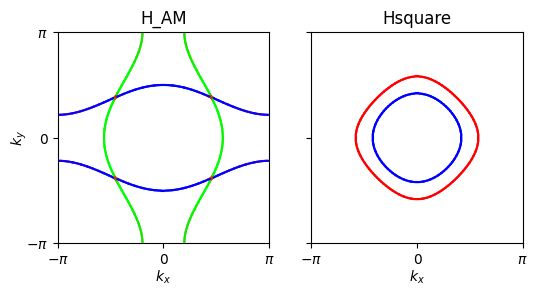

In [6]:
H_AM.update_params(dict(t=np.array([[1+0.5,1-0.5],[1-0.2,1+0.2]]),t12=0.2))

fig,axs = plt.subplots(1,2, figsize=(6,3))

axs[0].set_title('H_AM')
plot_FS(axs[0], H_AM, Lk=100, coloring_operator=H_AM.operator.spin)

axs[1].set_title('Hsquare')
plot_FS(axs[1], Hsquare, Lk=100, coloring_operator=Hsquare.operator.spin,cmap='bwr',show_ylabel=False)

In [3]:
import matplotlib.pyplot as plt
Lk = 11
epsilon = 1/Lk
m1 = np.array([2*pi,pi])
m2 = np.array([pi,-2*pi])


plt.scatter(*ks)

plt.scatter(ks[0]+2*np.pi,ks[1]+np.pi)

NameError: name 'pi' is not defined

In [ ]:
#defines a Hamiltonian solely for testing purposes

import numpy as np
from numpy import pi,cos,sin,exp

#operators
Spin_operator = np.array([1,-1]) #spin up +1, spin down -1

#Definitions for the Square lattice
#lattice vectors
n1 = np.array([1,0])
n2 = np.array([0,1])

# Area of unit cell (2D cross product)
A = n1[0]*n2[1] - n1[1]*n2[0]
#reciprocal lattice vectors
m1 = 2*np.pi/A * np.array([n2[1], -n2[0]])
m2 = 2*np.pi/A * np.array([-n1[1], n1[0]])

# Define High symmetry points in BZ
points_BZ = {
    "\Gamma": [0,0],
    "X": [1,0],
    "Y": [0,1],
    "R": [1,1],
    "R'": [1,-1],
    "-R": [-1,1],
    "-R'": [-1,-1]
}


def Hamiltonian0(kx,ky,t=1,mu=-1): 
    """
    Simple 2D square lattice tight-binding model with NN hopping and chemical potential.
    t: NN hopping
    mu: chemical potential
    """
    Hk = np.zeros((2,2,*kx.shape),dtype=complex) #Basis (up,down)

    #set hamiltonian structure
    Hk[0,0] = -2*t*cos(kx) - 2*t*cos(ky) - mu

    #make hermitian
    Hk[1,0] = np.conjugate(Hk[0,1])

    #spin degenerate
    Hk[1:,1:] = Hk[:1,:1]

    return Hk


# Create Hamiltonian2D object
Htest = Hamiltonian2D(Hamiltonian0, basis=['up','down'])

0.06314300089267522


(1.5, 2.5)

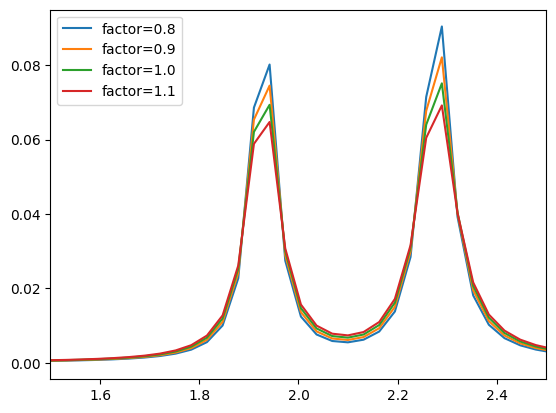

In [ ]:
from blochK.hamiltonian_testing import create_Hsquare
import numpy as np
from numpy import pi,cos,sin,exp


#finding the right Gamma for a given Lq
Lq = 200

H = create_Hsquare()
H.set_params(dict(t=1,mu=-1,m=0.3))

# Define the k-point grid
kxs = np.linspace(-pi,pi,Lq)
kys = kxs*0
#Diagonalize Hamiltonian
es,psis = H.diagonalize(kxs,kys)

des_y = np.roll(es, 1, axis=1) - es
des = np.abs([des_y]).flatten()
des0 = des.max()
print(des.max())

factors = [0.8,0.9,1.,1.1]



for fac in factors:
    
    
    Gamma = des.max() * fac

    Ak = np.sum(Gamma/(es**2+Gamma**2),axis=(0))/Lq


    plt.plot(kxs,Ak,label='factor='+str(fac))

plt.legend()
plt.xlim(1.5,2.5)

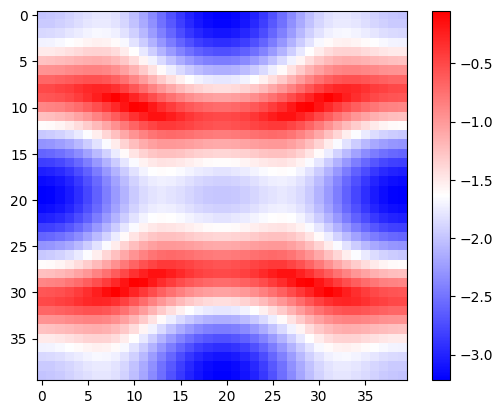

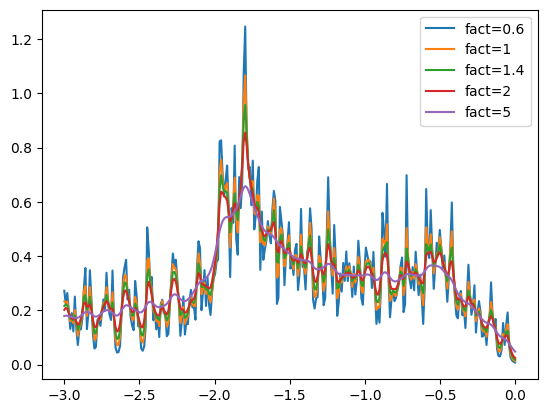

In [34]:
Lk = 40

Hamiltonian = H_AM

ks = plotting.utils.sample_square(Lk)

es,psis = Hamiltonian.diagonalize(*ks)

de = es[0]-es[1]

im = plt.imshow(de,cmap='bwr')
plt.colorbar(im)
plt.show()

de0 = de[3,5]

energies = np.linspace(-3,0,300)

for fact in [0.6,1,1.4,2,5]:
    
    eps = (energies[1]-energies[0])*fact

    delta = eps/((energies[np.newaxis,np.newaxis,:]-de[:,:,np.newaxis])**2+eps**2)/np.pi

    delta = np.sum(delta,axis=(0,1))/Lk**2

    plt.plot(energies,delta,label='fact='+str(fact))

plt.legend()


# for fact in np.linspace(0.2,0.6,5):
#     eps = (energies[1]-energies[0])*fact
#     delta = eps/((energies-de0)**2+eps**2)/np.pi
#     plt.plot(energies,delta,label='eps='+str(fact))

# plt.plot(energies,eps/((energies-de0)**2+eps**2)/np.pi,label='eps='+str(fact))

# plt.axvline(de0)
# plt.legend()


In [ ]:
Hamiltonian = H_AM
Lk = 30

omegas = np.linspace(0,4,200)
fact_eps = 2



Hamiltonian = Hamiltonian2D(hamiltonian_testing.H_AM_fct)
Hamiltonian.update_params(dict(t=np.array([[1+0.5,1-0.5],[1-0.2,1+0.2]]),t12=0.2))

omegas = np.linspace(0,4,200)

intensity = magnetic_linear_dichroism(Hamiltonian, omegas)
assert intensity.shape == (2, len(omegas)), "intensity.shape should be (2, len(omegas))"




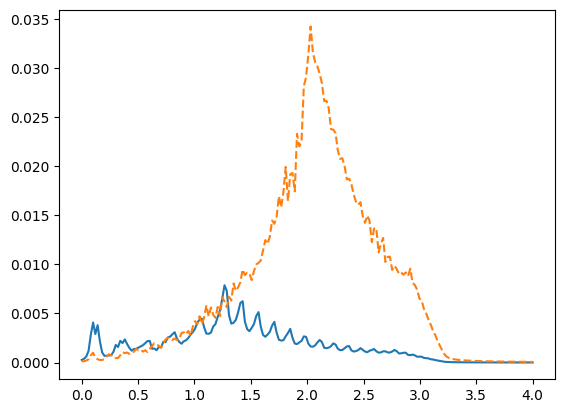

In [43]:
plt.plot(omegas,intensity[0])
plt.plot(omegas,intensity[1],'--')

In [23]:
import numpy as np

Hk = 1j*np.random.rand(4,4,2,1)

#Hk = np.random.rand(3,3,1)


print(H_hermitian.shape)



(2, 1, 4, 4)
(4, 4, 2, 1)


In [21]:
Hk_tri

array([[[0.        , 0.64082025, 0.30452897],
        [0.        , 0.        , 0.26680615],
        [0.        , 0.        , 0.        ]]])